# Pi Data machine learning challenge

# Librerías más generales

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sn
import pandas as pd
from textwrap import wrap

#Plot style
sn.set_style("whitegrid")
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.edgecolor'] = '#505b63'
mpl.rcParams['xtick.labelsize']=20
mpl.rcParams['axes.labelsize']=20
mpl.rcParams['ytick.labelsize']=20
mpl.rcParams['axes.titlesize']=23
mpl.rcParams['figure.titlesize']=26
mpl.rcParams['legend.fontsize']=15
mpl.rcParams.update({'lines.markeredgewidth': 1})

# Cargo Datos

In [2]:
train = pd.read_csv('data/Train_BigMart.csv')
test = pd.read_csv('data/Test_BigMart.csv')

# Análisis de datos preliminar


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Faltan valores en el peso del item y en el tamaño de la tienda

### Descripción de atributos

1. Item_Identifier: nombre o identificador del producto
2. Item_Weight: peso del producto en gramos
3. Item_Fat_Content: clasificación del producto en términos de grasas contenidas en él.
4. Item_Visibility: scoring de visibilidad del producto: medida que hace referencia al conocimiento del producto en el consumidor. ¿Qué tan fácil puede ser encontrado el producto?
5. Item_Type: tipo de producto
6. Item_MRP: máximum retailed price. Precio calculado por el fabricante que indica elprecio más alto que se puede cobrar por el producto.
7. Outlet_Identifier: identificador de la tienda
8. Outlet_Establishment_Year: año de lanzamiento de la tienda
9. Outlet_Size: tamaño de la tienda
10. Outlet_Location_Type: clasificación de las tiendas según ubicación
11. Outlet_Type: tipo de tienda
12. Item_Outlet_Sales: ventas del producto en cada observacion

### Asunciones:
1. La categoría del producto podría tener cierto impacto en las ventas: productos de consumo general se venden más que bebidas alcohólicas.
2. El tipo de tienda y su ubicación es importante para las ventas.
3. El tamaño de la tienda puede ser importante (¿la gente va a las tiendas grandes para comprar todo lo que necesita de una sola vez y conseguir mejores precios, o prefiere visitar tiendas pequeñas?)


In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Diferencio variables continuas de categóricas

In [5]:
vbles_con_output = ['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']
vbles_con = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
vbles_cat = ['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type',  'Outlet_Establishment_Year']

El año de establecimiento si bien es numérico es como el outlet_type, que es tier 1, tier 2, tier 3 (podria ser 1 2 y 3)

### Análisis de cantidad de categorías

In [6]:
print("Cantidad de items", train["Item_Identifier"].nunique())
print("Cantidad de categorías de contenido graso", train["Item_Fat_Content"].nunique())
print("Cantidad de tipos de items", train["Item_Type"].nunique())
print("Cantidad de tiendas", train["Outlet_Identifier"].nunique())
print("Cantidad de categorías para el tamaño de la tienda", train["Outlet_Size"].nunique())
print("Cantidad de categorías de ubicación de tienda", train["Outlet_Location_Type"].str.lower().nunique())
print("Cantidad de tipos de tienda", train["Outlet_Type"].nunique())

Cantidad de items 1559
Cantidad de categorías de contenido graso 5
Cantidad de tipos de items 16
Cantidad de tiendas 10
Cantidad de categorías para el tamaño de la tienda 3
Cantidad de categorías de ubicación de tienda 3
Cantidad de tipos de tienda 4


Observo que la cantidad de items representan casi el 20% de la cantidad de datos totales, esto será un problema, se incrementarían enormemente la cantidad de atributos... maldición de la dimensionalidad... -> lo descarto, me importa mas el tipo de item más que si una gaseosa es fanta o coca cola

### Chequeo que no haya nada raro con las categorías

In [7]:
print("Categorías de contenido graso", train["Item_Fat_Content"].unique().tolist())
print("\nTipos de items", train["Item_Type"].unique().tolist())
print("\nTiendas", train["Outlet_Identifier"].unique().tolist())
print("\nCategorías para el tamaño de la tienda", train["Outlet_Size"].unique().tolist())
print("\nCategorías de ubicación de tienda", train["Outlet_Location_Type"].unique().tolist())
print("\nTipos de tienda", train["Outlet_Type"].unique().tolist())
print("\nAños de apertura", train["Outlet_Establishment_Year"].unique().tolist())

Categorías de contenido graso ['Low Fat', 'Regular', 'low fat', 'LF', 'reg']

Tipos de items ['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables', 'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods', 'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned', 'Breads', 'Starchy Foods', 'Others', 'Seafood']

Tiendas ['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045', 'OUT017', 'OUT046', 'OUT035', 'OUT019']

Categorías para el tamaño de la tienda ['Medium', nan, 'High', 'Small']

Categorías de ubicación de tienda ['Tier 1', 'Tier 3', 'Tier 2']

Tipos de tienda ['Supermarket Type1', 'Supermarket Type2', 'Grocery Store', 'Supermarket Type3']

Años de apertura [1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004]


De aqui observo que debo corregir el tipo de contenido graso -> Low Fat = low fat = LF

In [8]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace('Low Fat', 'LF').replace('low fat', 'LF').replace('reg', 'R').replace('Regular', 'R')

### Por último me gustaría ver que cantidad de datos tiene cada categoría

In [9]:
print('Item_Fat_Content:\n', train['Item_Fat_Content'].value_counts())
print('\nItem_Type:\n', train['Item_Type'].value_counts())
print('\nOutlet_Identifier:\n', train['Outlet_Identifier'].value_counts())
print('\nOutlet_Size:\n', train['Outlet_Size'].value_counts())
print('\nOutlet_Location_Type:\n', train['Outlet_Location_Type'].value_counts())
print('\nOutlet_Type:\n', train['Outlet_Type'].value_counts())

Item_Fat_Content:
 LF    5517
R     3006
Name: Item_Fat_Content, dtype: int64

Item_Type:
 Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Outlet_Identifier:
 OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Outlet_Location_Type:
 Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int6

Quería ver si hay categorías que se podian agrupar en 'otras' debido a su escasa cantidad de datos y así reducir la dimensionalidad. Un ejemplo de esto es tipo de item: Seafood

## Variables continuas

### Histogramas

In [10]:
def hist(data, bins=45, size=(12,9)):
    fig = plt.figure(figsize=(12,9))
    n_plot = 1
    for key in data.keys():
        ax = plt.subplot(2,2,n_plot)
        ax.hist(data[key], bins=bins)
        ax.set_title(key)
        ax.set_ylabel('Count')
        ax.set_xlabel('Value')
        n_plot += 1
    plt.suptitle('Data histogram')
    plt.tight_layout()
    plt.show()
    
def dhist(data, data_t, bins=45, size=(12,9)):
    fig = plt.figure(figsize=(12,9))
    n_plot = 1
    for key in data.keys():
        ax = plt.subplot(2,2,n_plot)
        ax.hist(data[key], bins=bins, label='train', density=True)
        ax.hist(data_t[key], bins=bins, alpha=0.3, label='test', density=True)
        ax.set_title(key)
        ax.set_ylabel('Count')
        ax.set_xlabel('Value')
        ax.legend()
        n_plot += 1
    plt.suptitle('Data histogram')
    plt.tight_layout()
    plt.show()

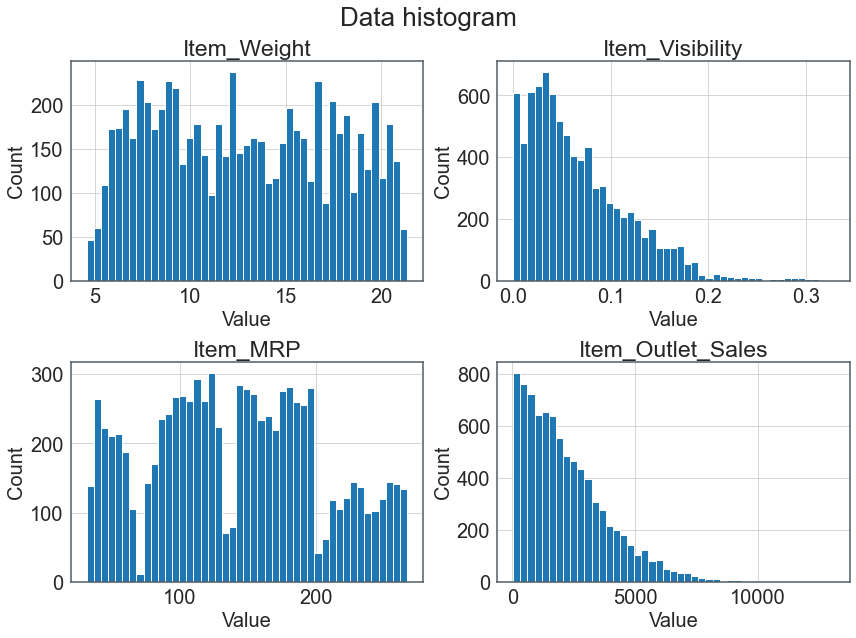

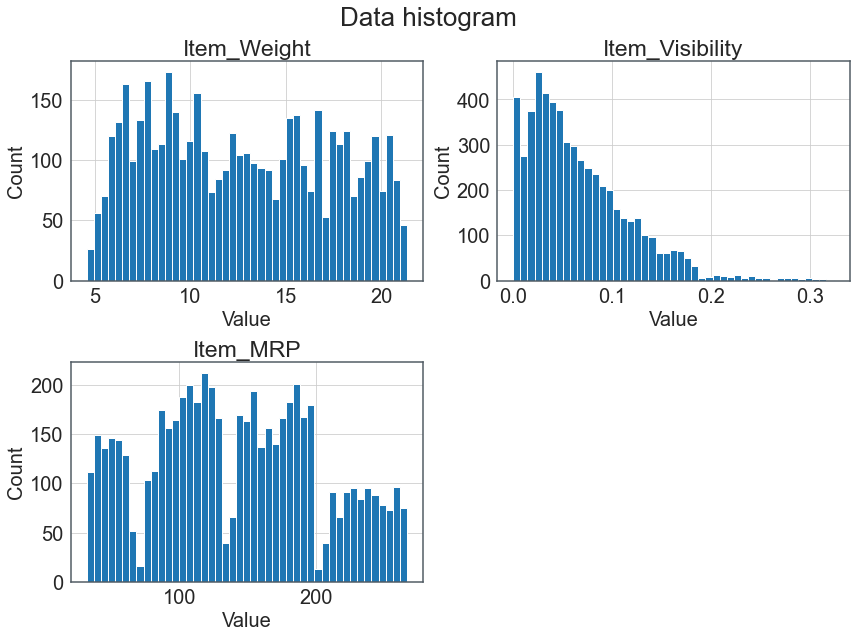

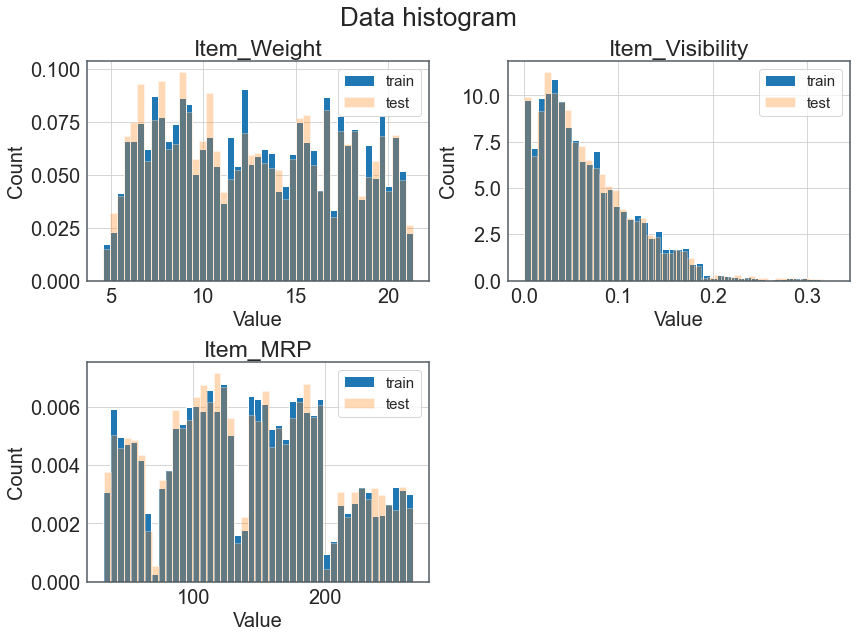

In [11]:
hist(train[vbles_con_output])
hist(test[vbles_con])
dhist(train[vbles_con], test[vbles_con])

Observo que hay muchisimos items que se venden poco y que decae a medida que se tiene items con mayor venta, lo cual es lógico. 
Creo que el valor 0 en item visibility en realidad puede ser que son datos faltantes la distribución parece tener un máximo y de repente aparecen muchas cuentas en cero

In [17]:
print('Zero visibility items', len(train['Item_Visibility'][train['Item_Visibility']==0]))

Zero visibility items 526


### Correlaciones

In [18]:
def correlation_heatmap(train, method='pearson', name='Pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(10,10))
    sn.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
    plt.title(name)
    plt.show()

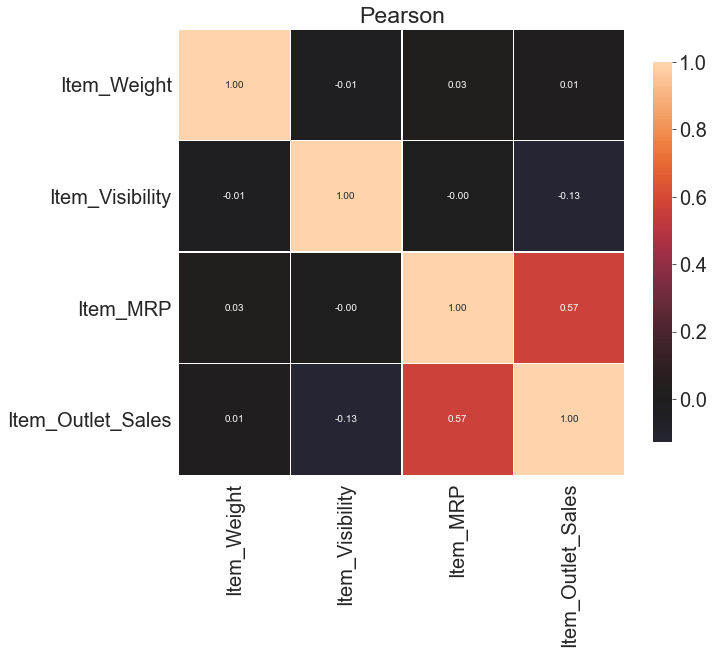

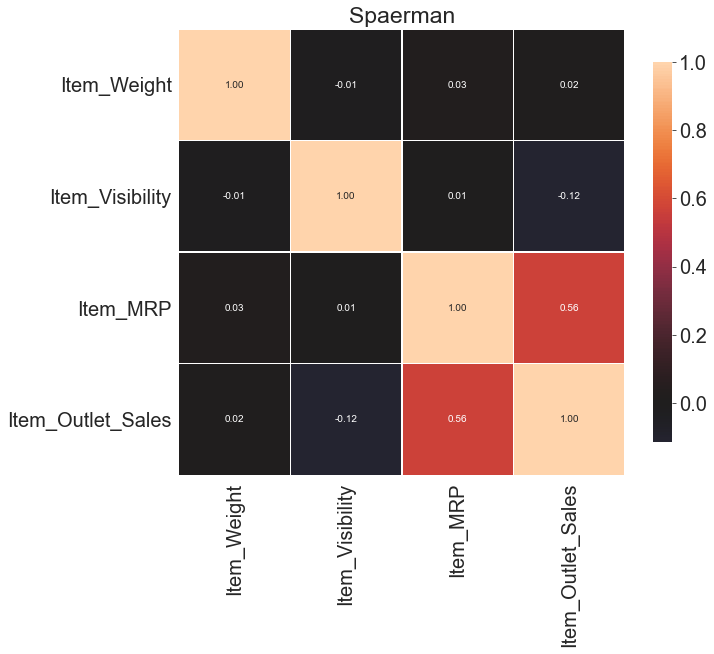

In [19]:
correlation_heatmap(train[vbles_con_output], 'pearson', 'Pearson')
correlation_heatmap(train[vbles_con_output], 'spearman', 'Spaerman')

Observo que hay una correlación entre el precio máximo del producto y la cantidad de ventas. Me sorprende que sea directamente proporcional y no inversamente proporcional, esperaría que mayor sea el precio máximo, menos compre la gente, lo relaciono con bien de lujo si se quiere. Item_MRP es candidato a ser un atributo importante por la correlación que tiene

### Relleno atributos faltantes
Para esto quiero ver si hay alguna dependencia del valor medio del peso de los items (la vble continua que tiene missing values) y alguna variable categorica

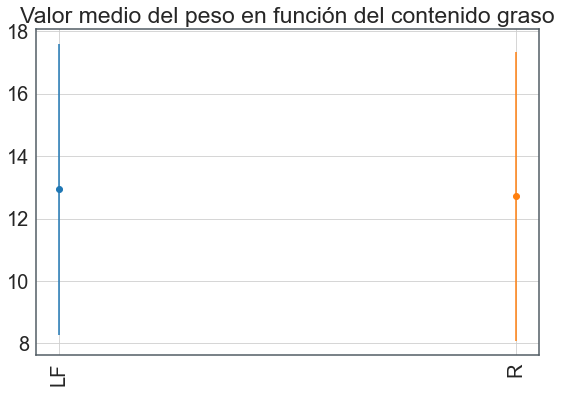

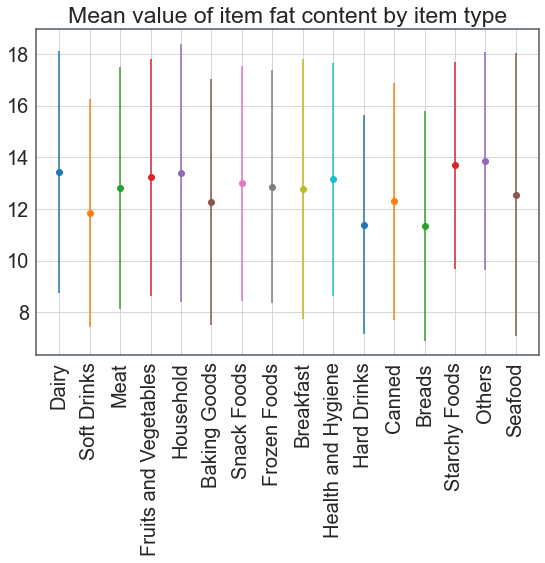

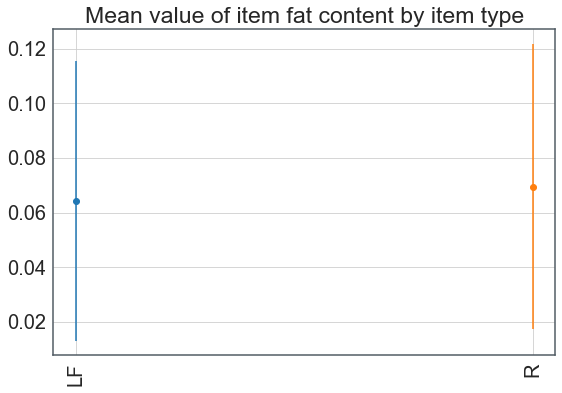

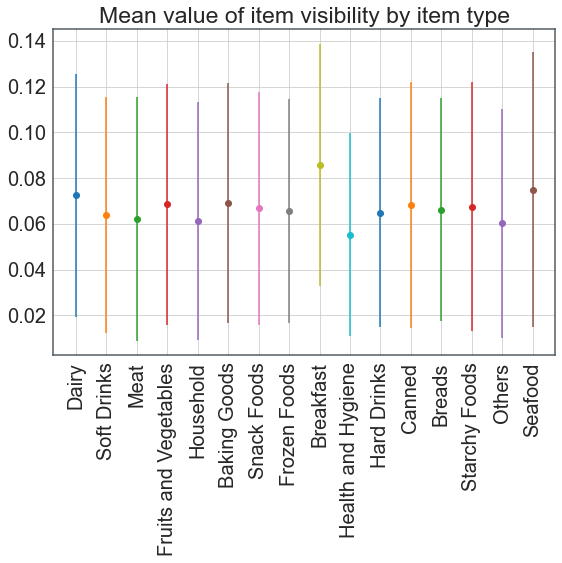

In [16]:
fat_categories = train['Item_Fat_Content'].unique().tolist()
fig = plt.figure(figsize=(9,6))
c = 1
for fat in fat_categories:
    aux = train['Item_Weight'][train['Item_Fat_Content']==fat].describe(percentiles = [])
    plt.errorbar(c, aux['mean'], aux['std'], fmt='o')
    #print('Categoría de contenido graso: '+fat+'\n', aux)
    #print('\n')
    c+=1
plt.title('Valor medio del peso en función del contenido graso')
plt.xticks(range(1, c), train['Item_Fat_Content'].unique(), rotation='vertical')
plt.show()

print('\n')

type_categories = train['Item_Type'].unique().tolist()
fig = plt.figure(figsize=(9,6))
c = 1
for i_type in type_categories:
    aux = train['Item_Weight'][train['Item_Type']==i_type].describe(percentiles = [])
    plt.errorbar(c, aux['mean'], aux['std'], fmt='o')
    #print('Categoría de item: '+i_type+'\n', aux)
    #print('\n')
    c+=1
plt.title('Mean value of item fat content by item type')
plt.xticks(range(1, c), train['Item_Type'].unique(), rotation='vertical')
plt.show()

#Ahora para visibility

fat_categories = train['Item_Fat_Content'].unique().tolist()
fig = plt.figure(figsize=(9,6))
c = 1
for fat in fat_categories:
    aux = train['Item_Visibility'][train['Item_Fat_Content']==fat].describe(percentiles = [])
    plt.errorbar(c, aux['mean'], aux['std'], fmt='o')
    #print('Categoría de contenido graso: '+fat+'\n', aux)
    #print('\n')
    c+=1
plt.title('Mean value of item fat content by item type')
plt.xticks(range(1, c), train['Item_Fat_Content'].unique(), rotation='vertical')
plt.show()

print('\n')

type_categories = train['Item_Type'].unique().tolist()
fig = plt.figure(figsize=(9,6))
c = 1
for i_type in type_categories:
    aux = train['Item_Visibility'][train['Item_Type']==i_type].describe(percentiles = [])
    plt.errorbar(c, aux['mean'], aux['std'], fmt='o')
    #print('Categoría de item: '+i_type+'\n', aux)
    #print('\n')
    c+=1
plt.title('Mean value of item visibility by item type')
plt.xticks(range(1, c), train['Item_Type'].unique(), rotation='vertical')
plt.show()

No hay gran diferencia, aún así voy a rellenar por tipo de item el valor medio del peso

In [138]:
def mean_imputer_NA(data, data_t, atr, atr_filter):
    key_filter = data[atr_filter].unique()
    for key in key_filter:
        mean = np.mean(data[atr][data[atr_filter] == key])
        data[atr][data[atr_filter] == key] = data[atr][data[atr_filter] == key].fillna(mean)
        data_t[atr][data_t[atr_filter] == key] = data_t[atr][data_t[atr_filter] == key].fillna(mean)
    return data, data_t

def mean_imputer_0(data, data_t, atr, atr_filter):
    key_filter = data[atr_filter].unique()
    for key in key_filter:
        mean = np.mean(data[atr][data[atr_filter] == key])
        data[atr][data[atr_filter] == key] = data[atr][data[atr_filter] == key].replace(0, mean)
        data_t[atr][data_t[atr_filter] == key] = data_t[atr][data_t[atr_filter] == key].replace(0, mean)
    return data, data_t


In [139]:
train, test = mean_imputer_NA(train, test, 'Item_Weight', 'Item_Type')
train, test = mean_imputer_0(train, test, 'Item_Visibility', 'Item_Type')

D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:14: SettingWit

In [140]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### Scatterplots

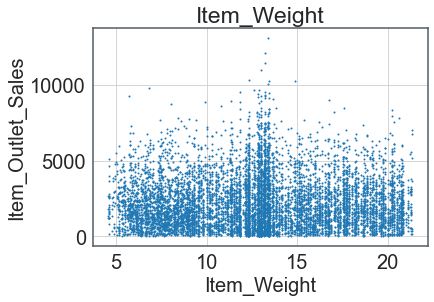

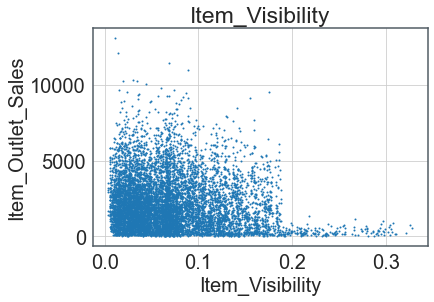

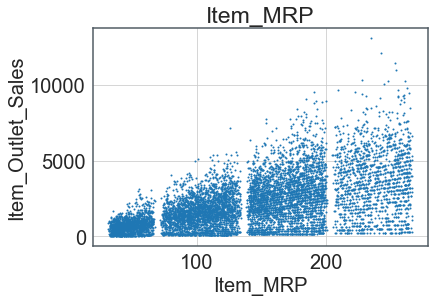

In [141]:
train.plot.scatter(x="Item_Weight", y="Item_Outlet_Sales", s=1)
plt.title('Item_Weight')
plt.show()
train.plot.scatter(x="Item_Visibility", y="Item_Outlet_Sales", s=1)
plt.title('Item_Visibility')
plt.show()
train.plot.scatter(x="Item_MRP", y="Item_Outlet_Sales", s=1)
plt.title('Item_MRP')
plt.show()

Mas allá del resultado de la matriz de correlación, que en parte se ve aquí en el scatter de Item_MRP, yo noto una relación entre una baja visibilidad y grandes ventas (antiintuitivo, a menos que visibility sea inversamente proporcional a la visibilidad?) Y que productos ni muy livianos ni muy pesados tienden a acumular más ventas

### Exploración de nuevos atributos

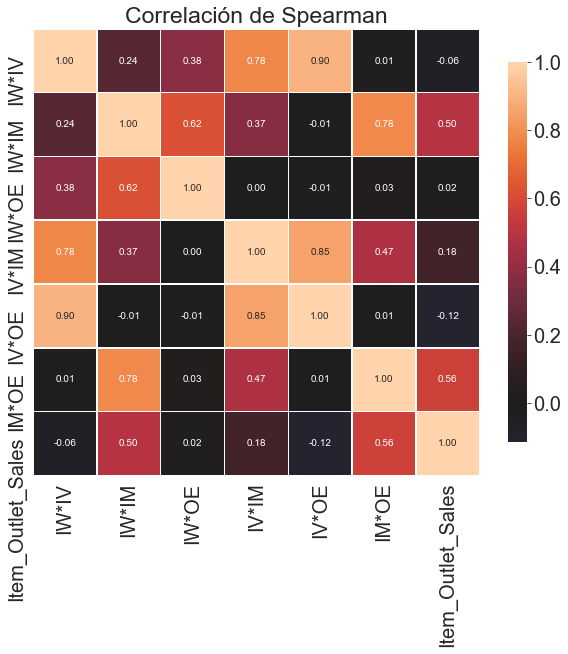

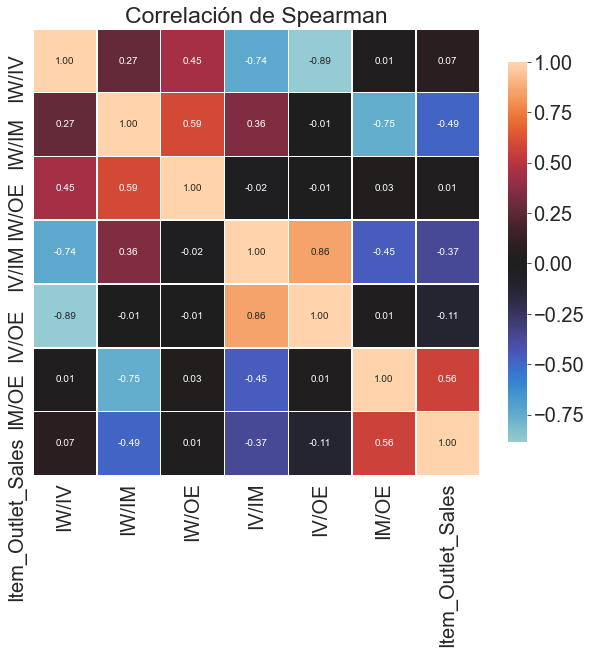

In [170]:
train['IW*IV'] = train['Item_Weight']*train['Item_Visibility']
test['IW*IV'] = test['Item_Weight']*test['Item_Visibility']
train['IW*IM'] = train['Item_Weight']*train['Item_MRP']
test['IW*IM'] = test['Item_Weight']*test['Item_MRP']
train['IW*OE'] = train['Item_Weight']*train['Outlet_Establishment_Year']
test['IW*OE'] = test['Item_Weight']*test['Outlet_Establishment_Year']

train['IV*IM'] = train['Item_Visibility']*train['Item_MRP']
test['IV*IM'] = test['Item_Visibility']*test['Item_MRP']
train['IV*OE'] = train['Item_Visibility']*train['Outlet_Establishment_Year']
test['IV*OE'] = test['Item_Visibility']*test['Outlet_Establishment_Year']

train['IM*OE'] = train['Item_MRP']*train['Outlet_Establishment_Year']
test['IM*OE'] = test['Item_MRP']*test['Outlet_Establishment_Year']

vbles_con_new = ['IW*IV', 'IW*IM', 'IW*OE', 'IV*IM', 'IV*OE', 'IM*OE', 'Item_Outlet_Sales']
correlation_heatmap(train[vbles_con_new], 'spearman', 'Spearman')

train['IW/IV'] = train['Item_Weight']/train['Item_Visibility']
test['IW/IV'] = test['Item_Weight']/test['Item_Visibility']
train['IW/IM'] = train['Item_Weight']/train['Item_MRP']
test['IW/IM'] = test['Item_Weight']/test['Item_MRP']
train['IW/OE'] = train['Item_Weight']/train['Outlet_Establishment_Year']
test['IW/OE'] = test['Item_Weight']/test['Outlet_Establishment_Year']

train['IV/IM'] = train['Item_Visibility']/train['Item_MRP']
test['IV/IM'] = test['Item_Visibility']/test['Item_MRP']
train['IV/OE'] = train['Item_Visibility']/train['Outlet_Establishment_Year']
test['IV/OE'] = test['Item_Visibility']/test['Outlet_Establishment_Year']

train['IM/OE'] = train['Item_MRP']/train['Outlet_Establishment_Year']
test['IM/OE'] = test['Item_MRP']/test['Outlet_Establishment_Year']

vbles_con_new = ['IW/IV', 'IW/IM', 'IW/OE', 'IV/IM', 'IV/OE', 'IM/OE', 'Item_Outlet_Sales']
correlation_heatmap(train[vbles_con_new], 'spearman', 'Spearman')

En lugar de utilizar Item Weight y Item Visibility pelados voy a usarlos normalizados por el precio máximo

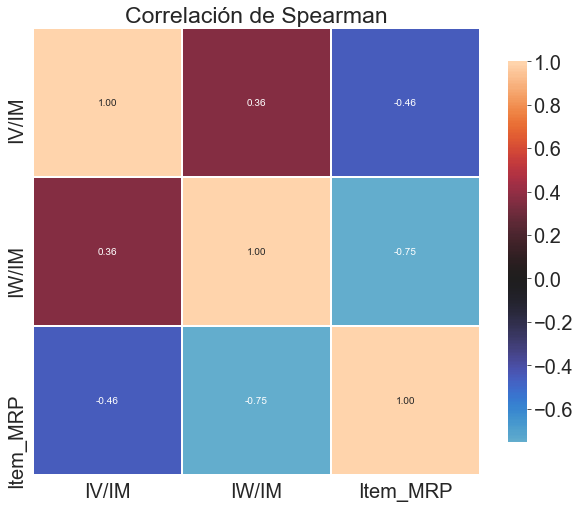

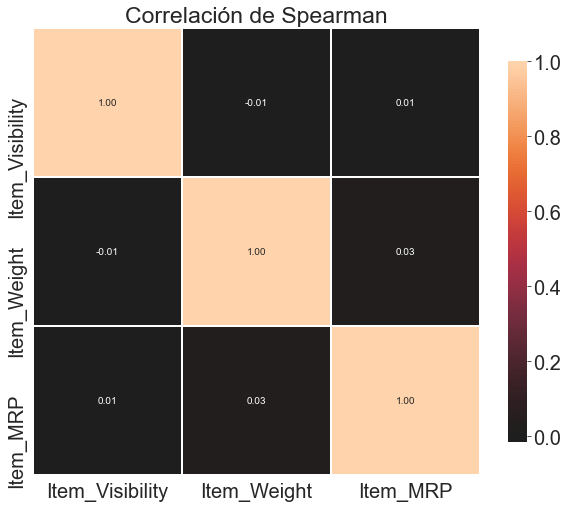

In [171]:
vbles_con_useful_1 = ['IV/IM', 'IW/IM', 'Item_MRP']
vbles_con_useful_2 = ['Item_Visibility', 'Item_Weight', 'Item_MRP']
correlation_heatmap(train[vbles_con_useful_1], 'spearman', 'Spearman')
correlation_heatmap(train[vbles_con_useful_2], 'spearman', 'Spearman')

No me convencieron, voy a utilizar los originales, hay mucha correlación entre los generados y Item_MRP por ej

### Outliers

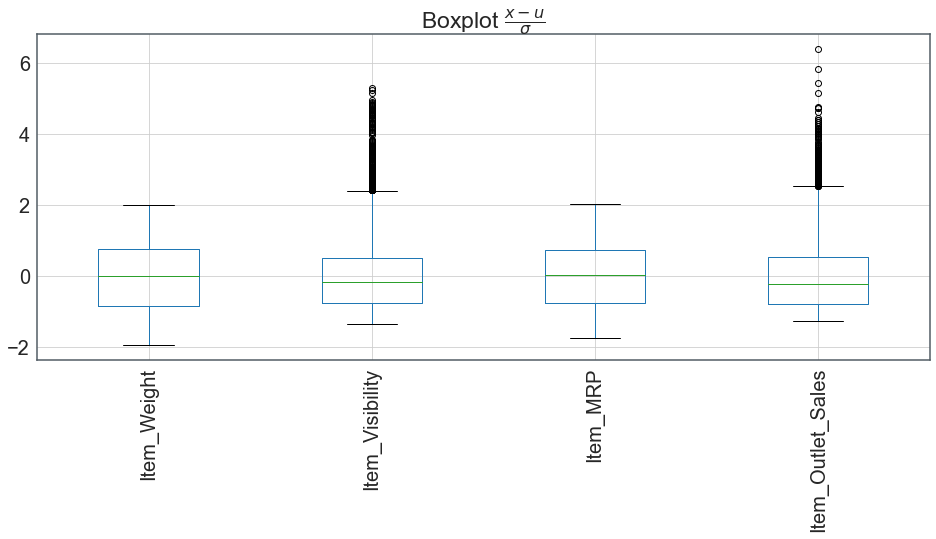

In [144]:
std=train[vbles_con_output].std(axis=0) #lo divido por la std para que quede todo más a escala
mean = train[vbles_con_output].mean(axis=0)
boxplot = train[vbles_con_output].sub(mean).div(std).boxplot(figsize=(16,6))
plt.xticks(rotation='vertical')
plt.title(r'Boxplot $\frac{x-u}{\sigma}$')
plt.show()

Los outliers son propios de la distribución de los datos y no porque realmente sean datos estadístico anómalos

## Variables categóricas

In [145]:
for cat in vbles_cat:
    print(train[cat].value_counts())

FDG33    10
FDW13    10
FDF52     9
FDD38     9
FDT07     9
         ..
DRF48     1
FDN52     1
FDK57     1
FDC23     1
FDO33     1
Name: Item_Identifier, Length: 1559, dtype: int64
LF    5517
R     3006
Name: Item_Fat_Content, dtype: int64
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64
OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64
Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: 

In [146]:
train['Outlet_Identifier'][train['Outlet_Size'].isna()].value_counts()

OUT045    929
OUT017    926
OUT010    555
Name: Outlet_Identifier, dtype: int64

### Completo valores faltantes en Outlet_Size

Falta el Outlet_Size para las tiendas 045, 017 y 010. Tengo algunas estrategías a partir de aquí. Ignoro el atributo. Ignoro estas observaciones -> pierdo aprox 2500 datos de entrenamiento. Remplazo por categoría 'other' o busco inferir en el tamaño de estas tiendas en base a las otras, por ejemplo con otro entrenamiento previo a la regresión deseada, utilizando KNN o algo así

Voy a utilizar KNN, primero hago one hot encoder

In [147]:
x_train = train[train['Outlet_Size'].notnull()]
y_train = x_train['Outlet_Size']
x_train = x_train.drop(['Item_Identifier','Outlet_Size'], axis=1)
x_train_dummies = pd.get_dummies(x_train)

x_val = train[train['Outlet_Size'].isna()].drop(['Item_Identifier','Outlet_Size'], axis=1)
x_val_dummies = pd.get_dummies(x_val)

Hay diferencias entre las keys obtenidas, esto es porque las las tiendas que no tienen tamaño no aparecen en el data set x_train, por ejemplo (hablo de Outlet_Identifier)

In [148]:
dif_keys = list(set(x_train_dummies.keys()) - set(x_val_dummies.keys()))
dif_keys_2 = list(set(x_val_dummies.keys()) - set(x_train_dummies.keys()))

for key in dif_keys:
    if key not in x_train_dummies.keys():
        x_train_dummies[key] = 0
    if key not in x_val_dummies.keys():
        x_val_dummies[key] = 0
        
for key in dif_keys_2:
    if key not in x_train_dummies.keys():
        x_train_dummies[key] = 0
    if key not in x_val_dummies.keys():
        x_val_dummies[key] = 0

Entreno con cross validation

In [149]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

KNN=KNeighborsClassifier()
idx=list(np.arange(5, 100, 5))
param_KNN = [{'n_neighbors': idx}]

search_KNN = GridSearchCV(KNN, 
                          param_KNN, 
                          cv=5, 
                          scoring='balanced_accuracy', #se podría decir que hay un poco de data imbalance
                          return_train_score=True,
                         verbose=1)
search_KNN.fit(x_train_dummies, y_train_aux)

Fitting 5 folds for each of 19 candidates, totalling 95 fits


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [5, 10, 15, 20, 25, 30, 35, 40, 45, 50,
                                          55, 60, 65, 70, 75, 80, 85, 90,
                                          95]}],
             return_train_score=True, scoring='balanced_accuracy', verbose=1)

In [150]:
import dill

print('Mejores parámetros:')
print(search_KNN.best_params_)
final_model_KNN=search_KNN.best_estimator_
dill.dump(final_model_KNN, open('KNN.sav', 'wb'))

y_val_aux = final_model_KNN.predict(pd.get_dummies(x_val_dummies))

Mejores parámetros:
{'n_neighbors': 15}


In [151]:
x_val['Outlet_Size']=y_val_aux
x_val['Outlet_Identifier'].unique()

array(['OUT010', 'OUT045', 'OUT017'], dtype=object)

Me fijo la cantidad de tiendas que salio de la clasificación

In [152]:
print('Tamaño de la tienda 010:\n', x_val['Outlet_Size'][x_val['Outlet_Identifier']=='OUT010'].value_counts())
print('\nTamaño de la tienda 045:\n', x_val['Outlet_Size'][x_val['Outlet_Identifier']=='OUT045'].value_counts())
print('\nTamaño de la tienda 017:\n', x_val['Outlet_Size'][x_val['Outlet_Identifier']=='OUT017'].value_counts())

Tamaño de la tienda 010:
 Medium    274
Small     252
High       29
Name: Outlet_Size, dtype: int64

Tamaño de la tienda 045:
 Medium    561
Small     346
High       22
Name: Outlet_Size, dtype: int64

Tamaño de la tienda 017:
 Medium    542
Small     348
High       36
Name: Outlet_Size, dtype: int64


Observo que para la tienda 010 hay bastante confianza en que la tienda sea pequeña, para los otros dos da que la tienda es mediana sin mucha 'confianza', tengo dos estrategias, o dejo directamente el resultado de KNN o remplazo en base a esto. Voy a remplazar en base a esto por facilidad de código más adelante

In [153]:
def mean_imputer_size(data, data_t):
    data['Outlet_Size'][data['Outlet_Identifier']=='010'] = 'Small'
    data['Outlet_Size'][data['Outlet_Identifier']=='045'] = 'Medium'
    data['Outlet_Size'][data['Outlet_Identifier']=='017'] = 'Medium'
    data_t['Outlet_Size'][data_t['Outlet_Identifier']=='010'] = 'Small'
    data_t['Outlet_Size'][data_t['Outlet_Identifier']=='045'] = 'Medium'
    data_t['Outlet_Size'][data_t['Outlet_Identifier']=='017'] = 'Medium'
    return data, data_t

train, test = mean_imputer_size(train, test)

D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the 

### Análisis de relación entre categorías y salida

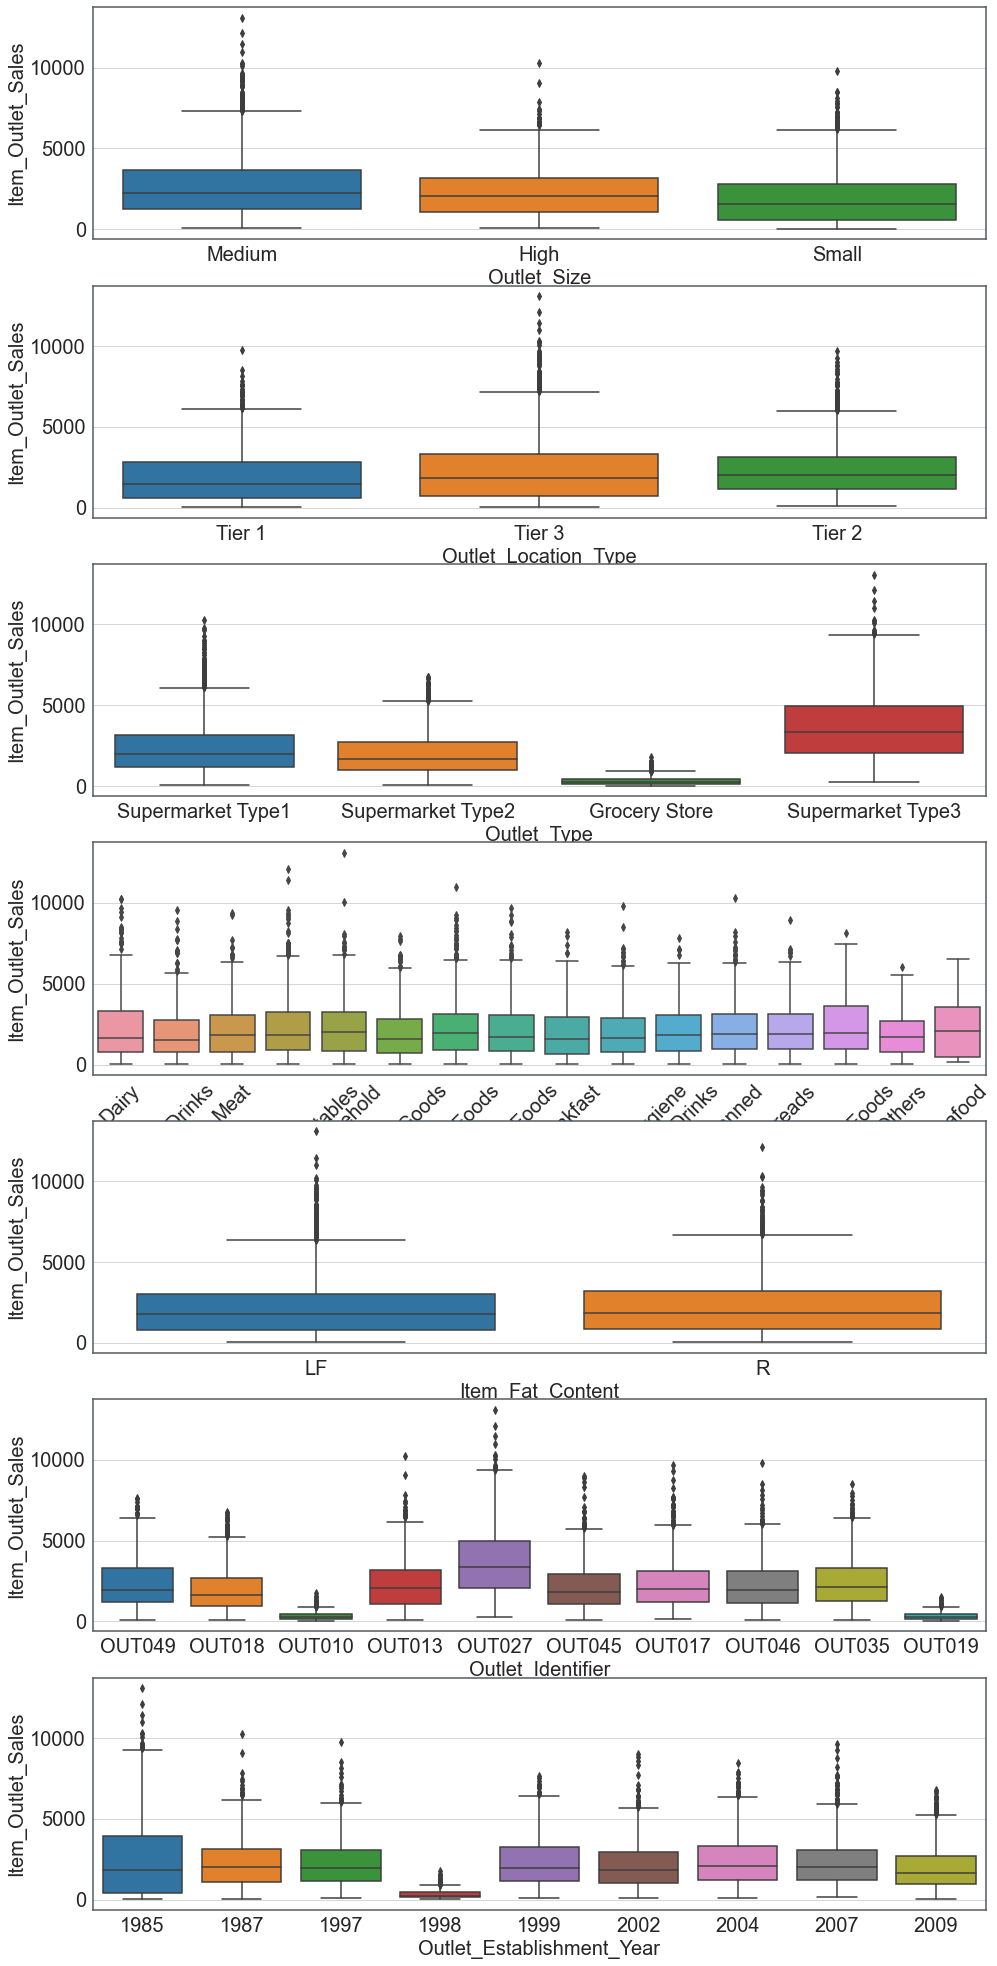

In [154]:
plt.figure(figsize = (16,35))

ax = plt.subplot(711)
sn.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=train)

ax = plt.subplot(712)
sn.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train)

ax = plt.subplot(713)
sn.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train)

ax = plt.subplot(714)
sn.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=train)
plt.setp(ax.get_xticklabels(), rotation=45)

ax = plt.subplot(715)
sn.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=train)

ax = plt.subplot(716)
sn.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=train)

ax = plt.subplot(717)
sn.boxplot(x='Outlet_Establishment_Year', y='Item_Outlet_Sales', data=train)

#plt.tight_layout()
plt.show()

In [155]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [20]:
print('Años donde vendieron las grocery store:\n', train['Outlet_Establishment_Year'][train['Outlet_Type']=='Grocery Store'].value_counts())
print('\nStores that are grocerys:\n', train['Outlet_Identifier'][train['Outlet_Type']=='Grocery Store'].value_counts())

Años donde vendieron las grocery store:
 1998    555
1985    528
Name: Outlet_Establishment_Year, dtype: int64

Stores that are grocerys:
 OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


In [22]:
train['Outlet_Size'][train['Outlet_Identifier']=='OUT019'].value_counts()

Small    528
Name: Outlet_Size, dtype: int64

Se observa que la tienda 10 es tipo grocery store: es chica (bien!) y vende poco. Además las grocery stores venddieron en el 1998 que es un año con pocas ventas!

# Preparo datos para la clasificación

Atributos:


* Item_Identifier: No lo voy a utilizar, demasiados atributos
* Item_Weight: Podría usarse a priori, una hipótesis es que la gente tiende a llevar productos más livianos
* Item_Fat_Content: Podría usarse a priori, una hipótesis es que hay gente que busca consumir cosas con menos contenido graso
* Item_Visibility: Podría usarse a priori
* Item_Type: Podría usarse a priori, sin embargo hay añade muchos atributos al hacer un OneHotEncoder
* Item_MRP: Debe usarse, muestra correlación con la cantidad de ventas
* Outlet_Identifier: Es un identificador de la tienda, no lo voy a utilizar
* Outlet_Establishment_Year: Puede usarse a prior. Una hipótesis es que la gente compra más en tiendas conocidas
* Outlet_Size: Puede usarse a priori, misma hipótesis anterior
* Outlet_Location_Type: Puede usarse a prior. Una hipótesis puede ser que se realizan mas compras en zonas céntricas, por ejemplo
* Outlet_Type: Puede usarse. Una pregunta sería, este atributo no condensa el tamaño, localización y año de apertura?


### Función de preprocesado de datos

Esto lo hago para cargar los datos y preprocesarlos rapidamente

In [105]:
def StandarScaler(x_train, x_test):
    '''
    Standar scaler
  
    Parameters
    ----------
    x_train : pandas.dataframe
      The training dataframe to scale.
    x_test : pandas.dataframe
      The validaiton/test dataframe to scale

    Returns
    -------
    x_train : pandas.dataframe
      Scaled x_train
    data_t : pandas.dataframe
      Scaled x_test
     '''
        
    u = x_train.mean() #escaleo con los datos de train
    s = x_train.std() #escaleo con los datos de train
    x_train = (x_train-u)/s
    x_test = (x_test-u)/s
    return x_train, x_test

def RobustScaler(x_train, x_test):
    '''
    Robust scaler
  
    Parameters
    ----------
    x_train : pandas.dataframe
      The training dataframe to scale.
    x_test : pandas.dataframe
      The validaiton/test dataframe to scale.

    Returns
    -------
    x_train : pandas.dataframe
      Scaled x_train.
    data_t : pandas.dataframe
      Scaled x_test.
     '''
    
    m = x_train.median() #escaleo con los datos de train
    p25 = x_train.quantile(0.25) #escaleo con los datos de train
    p75 = x_train.quantile(0.75) #escaleo con los datos de train
    x_train = (x_train-m)/(p75-p25)
    x_test = (x_test-m)/(p75-p25)
    return x_train, x_test

def MeanImputer_NA(data, data_t, atr, atr_filter):
    '''
    Mean Imputer for NA values
  
    Parameters
    ----------
    data : pandas.dataframe
      The training dataframe to process.
    data_t : pandas.dataframe
      The validaiton/test dataframe to process.
    atr: str
      Attribute that contains NA values.
    atr_filter : str
      Attribute used to filter data and compute mean value.

    Returns
    -------
    data : pandas.dataframe
      Preprocessed data.
    data_t : pandas.dataframe
      Preprocessed data_t.
    '''
    key_filter = data[atr_filter].unique()
    for key in key_filter:
        mean = np.mean(data[atr][data[atr_filter] == key])
        data[atr][data[atr_filter] == key] = data[atr][data[atr_filter] == key].fillna(mean)
        data_t[atr][data_t[atr_filter] == key] = data_t[atr][data_t[atr_filter] == key].fillna(mean)
    return data, data_t

def MeanImputer_0(data, data_t, atr, atr_filter):
    '''
    Mean Imputer for 0 (missing) values 
  
    Parameters
    ----------
    data : pandas.dataframe
      The training dataframe to process.
    data_t : pandas.dataframe
      The validaiton/test dataframe to process.
    atr: str
      Attribute that contains 0 values.
    atr_filter : str
      Attribute used to filter data and compute mean value.

    Returns
    -------
    data : pandas.dataframe
      Preprocessed data.
    data_t : pandas.dataframe
      Preprocessed data_t.
    '''
    key_filter = data[atr_filter].unique()
    for key in key_filter:
        mean = np.mean(data[atr][data[atr_filter] == key])
        data[atr][data[atr_filter] == key] = data[atr][data[atr_filter] == key].replace(0, mean)
        data_t[atr][data_t[atr_filter] == key] = data_t[atr][data_t[atr_filter] == key].replace(0, mean)
    return data, data_t

def MeanImputer_Size(data, data_t, atr, atr_filter):
    '''
    Mean Imputer for size missing values
  
    Parameters
    ----------
    data : pandas.dataframe
      The training dataframe to process.
    data_t : pandas.dataframe
      The validaiton/test dataframe to process.
    atr: str
      Attribute that contains 0 values.
    atr_filter : str
      Attribute used to filter data and replace NaN with correct values
    Returns
    -------
    data : pandas.dataframe
      Preprocessed data.
    data_t : pandas.dataframe
      Preprocessed data_t.
    '''
    data[atr][data[atr_filter]=='010'] = 'Small'
    data[atr][data[atr_filter]=='045'] = 'Medium'
    data[atr][data[atr_filter]=='017'] = 'Medium'
    data_t[atr][data_t[atr_filter]=='010'] = 'Small'
    data_t[atr][data_t[atr_filter]=='045'] = 'Medium'
    data_t[atr][data_t[atr_filter]=='017'] = 'Medium'
    return data, data_t

def ValueGrouper(Serie, group, value):
    for g in group:
        Serie = Serie.replace(g, value)

def LogTransform(x):
    '''
    Logarithmic space transform function. 
    '''
    return np.log(x+1)

def LogAntitransform(x):
    '''
    Anti-logarithmic space transform function. 
    '''
    return np.exp(x)-1

def predict(model, antitransform, x):
    return antitransform(model.predict(x))

def preprocessing(dataframe, dataframe_t, droppable_columns, integer_columns, categorical_columns, objective, transform=None, one_hot=False):
    '''
    Preprocessing function for the proposed dataframe.

    This functions modifies the dataframe from of the training set and the dataframe of the validation/test set to get categorical columns from strings,
    dropping non-informative attributes, and rescaling continuous attributes.

    Parameters
    ----------
    dataframe : pandas.dataframe
      The training dataframe to process.
    dataframe_t : pandas.dataframe
      The validaiton/test dataframe to process.
    droppable_columns : list
      List of droppable column strings.
    continuous_columns : list
      List of continuous column strings.
    categorical_columns : list
      List of categorical column strings.

    Returns
    -------
    dataframe : pandas.dataframe
      Preprocessed dataframe.
    dataframe_t : pandas.dataframe
      Preprocessed dataframe_t.
    '''

    for c in droppable_columns:
        dataframe = dataframe.drop(c, axis="columns")
        dataframe_t = dataframe_t.drop(c, axis="columns")
    for c in categorical_columns:
        if c == 'Item_Fat_Content':
            dataframe[c] = dataframe[c].replace('Low Fat', 'LF').replace('low fat', 'LF').replace('reg', 'R').replace('Regular', 'R')
            dataframe_t[c] = dataframe_t[c].replace('Low Fat', 'LF').replace('low fat', 'LF').replace('reg', 'R').replace('Regular', 'R')
        if c == 'Outlet_Size':
            dataframe[c], dataframe_t[c] = MeanImputer_Size(dataframe, dataframe_t, 'Outlet_Size', 'Outlet_Identifier')            
        dataframe[c] = dataframe[c].astype("category", copy=False)
        dataframe_t[c] = dataframe_t[c].astype("category", copy=False)
    for c in continuous_columns:
        if c == 'Item_Weight':
            dataframe[c], dataframe_t[c] = MeanImputer_NA(dataframe, dataframe_t, 'Item_Weight', 'Item_Type')
        if c == 'Item_Visibility':
            dataframe[c], dataframe_t[c] = MeanImputer_0(dataframe, dataframe_t, 'Item_Visibility', 'Item_Type')
        dataframe[c], dataframe_t[c] = StandarScaler(dataframe[c].astype('float64', copy=False), dataframe_t[c].astype('float64', copy=False))
    if one_hot:
        dataframe = pd.get_dummies(dataframe, categorical_columns)
        dataframe_t = pd.get_dummies(dataframe_t, categorical_columns)
    if transform:
        return dataframe.drop(objective, axis="columns"), dataframe_t.drop(objective, axis="columns"), transform(dataframe[objective]), transform(dataframe_t[objective])
    return dataframe.drop(objective, axis="columns"), dataframe_t.drop(objective, axis="columns"), dataframe[objective], dataframe_t[objective]

# Entreno

## Busqueda por hiperparámetros

In [50]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import KFold
import dill
import lightgbm as lgb

train = pd.read_csv('data/Train_BigMart.csv')
test = pd.read_csv('data/Test_BigMart.csv')

train, validation = train_test_split(train, test_size=1000)

# train['Item_Outlet_Sales'].hist(bins=45)
# plt.show()
# validation['Item_Outlet_Sales'].hist(bins=45)
# plt.show()

droppable_columns = ['Item_Identifier'] 
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_columns = ['Item_Type',  'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Outlet_Identifier', 'Item_Fat_Content']
objective = 'Item_Outlet_Sales'

x_train, x_val, y_train, y_val = preprocessing(train, validation, droppable_columns, continuous_columns, categorical_columns, objective)#, Log_Transform)

model = lgb.LGBMRegressor(random_state=42, 
                             objective="rmse",
                             silent=True
                             )

parameters = {
    'task': ['train'],
    'boosting_type': ['gbdt'],
    'objective': ['regression'],
    'metric': ['rmse'],
    'learning_rate': [0.005],
    'feature_fraction': [0.8, 0.9, 1],
    'bagging_fraction': [0.7, 0.85, 1],
    'bagging_freq': [10],
    'verbose': [0],
    "num_leaves": [128],  
    "max_bin": [512],
    "max_depth": [6, 8, 10],
    "silent": [True],
    "n_estimators": [1000],
    'n_iterations:': [10000]
}

n_splits = 5
kfold_5 = KFold(shuffle = True, n_splits = n_splits, random_state=42)

search = GridSearchCV(model, 
                           parameters, 
                           cv=kfold_5, 
                           scoring='neg_root_mean_squared_error', 
                           return_train_score=True, 
                           n_jobs=-1,
                           verbose=True)

search.fit(x_train, y_train)

D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:77: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:106: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:107: SettingWithCopyWarning: 
A value 

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[LightGBM] [Warning] Unknown parameter: n_iterations:
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Unknown parameter: n_iterations:
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.7, subsample=1.0 will be ignored. Current value: bagging_fraction=0.7
[LightGBM] [Warning] bagging_freq is set=10, subsample_freq=0 will be ignored. Current value: bagging_freq=10
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000321 seconds.
You can set `force_ro

NameError: name 'final_model_XGB' is not defined

In [55]:
print(search.best_params_)
final_model=search.best_estimator_

dill.dump(final_model, open('model_cv.sav', 'wb'))
dill.dump(search, open('search_cv.sav', 'wb'))

{'bagging_fraction': 0.7, 'bagging_freq': 10, 'boosting_type': 'gbdt', 'feature_fraction': 0.8, 'learning_rate': 0.005, 'max_bin': 512, 'max_depth': 6, 'metric': 'rmse', 'n_estimators': 1000, 'n_iterations:': 10000, 'num_leaves': 128, 'objective': 'regression', 'silent': True, 'task': 'train', 'verbose': 0}


Total predicted test: 2178685.29106226, Total real revenue: 2192608.5652
Total predicted training: 16401934.661259383, Total real training: 16398516.8452
RMSE validation: 1087.8449581591567


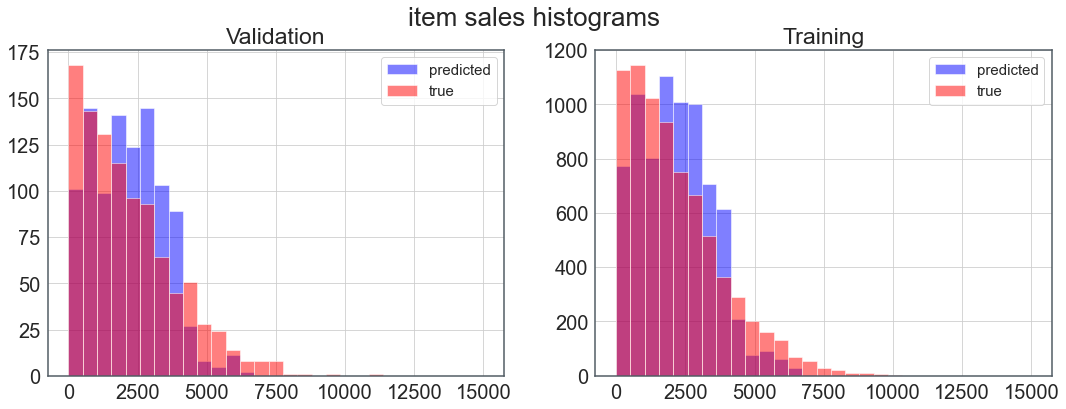

In [53]:
y_predicted_val = final_model.predict(x_val)
y_predicted_train = final_model.predict(x_train)
print(f"Total predicted test: {y_predicted_val.sum()}, Total real revenue: {y_val.values.sum()}")
print(f"Total predicted training: {y_predicted_train.sum()}, Total real training: {y_train.values.sum()}")
print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))

bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.hist(y_predicted_val, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_val, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.hist(y_predicted_train, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_train, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()

RMSE validation: 1087.8449581591567


[]

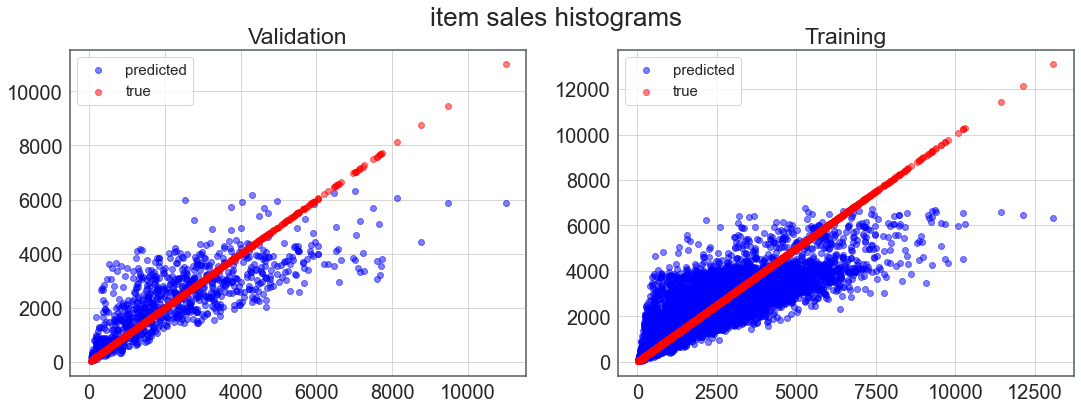

In [54]:
y_predicted_val = final_model.predict(x_val)
y_predicted_train = final_model.predict(x_train)

print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))
bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.scatter(y_val, y_predicted_val, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_val, y_val, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.scatter(y_train, y_predicted_train, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_train, y_train, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

## Definidos los hiperparámetros: Primera prueba

De ahora en más me quedo con los hiper parámetros obtenidos por crossvalidation, lo correcto sería volver a encontrarlos para cada prueba pero esto implica consumo de tiempo

In [106]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgb

train = pd.read_csv('data/Train_BigMart.csv')
test = pd.read_csv('data/Test_BigMart.csv')

train, validation = train_test_split(train, test_size=1000)

# train['Item_Outlet_Sales'].hist(bins=45)
# plt.show()
# validation['Item_Outlet_Sales'].hist(bins=45)
# plt.show()

droppable_columns = ['Item_Identifier'] 
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_columns = ['Item_Type',  'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Outlet_Identifier']
objective = 'Item_Outlet_Sales'

x_train, x_val, y_train, y_val = preprocessing(train, validation, droppable_columns, continuous_columns, categorical_columns, objective)#, Log_Transform)

train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_columns)
validation_data = lgb.Dataset(x_val, label=y_val, categorical_feature=categorical_columns)


parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,
    "num_leaves": 128,  
    "max_bin": 512,
    "silent": True,
    "num_iterations": 100000,
    "n_estimators": 1000

}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=validation_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)



D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:114: SettingWithCopyWarning: 
A valu

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000623 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 1709.77
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 1704.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 1699.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's rmse: 1693.92
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's rmse: 1688.75
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's rmse: 1683.59
[LightGBM] [War

D:\Anaconda3\envs\tesis\lib\site-packages\lightgbm\basic.py:1098: UserWarning: categorical_column in param dict is overridden.
  warnings.warn('{} in param dict is overridden.'.format(cat_alias))


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[34]	valid_0's rmse: 1569.63
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[35]	valid_0's rmse: 1565.28
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	valid_0's rmse: 1560.96
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	valid_0's rmse: 1556.67
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	valid_0's rmse: 1552.43
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	valid_0's rmse: 1550.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[40]	valid_0's rmse: 1546.3
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[41]	valid_0's rmse: 1542.2
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[42]	valid_0's rmse: 1540.41
[LightGBM] [Warning] No further splits with positive gain, best ga

Total predicted test: 2202966.259959248, Total real revenue: 2179779.9308
Total predicted training: 16405423.692723656, Total real training: 16411345.479600001
RMSE validation: 1046.739318970521


[]

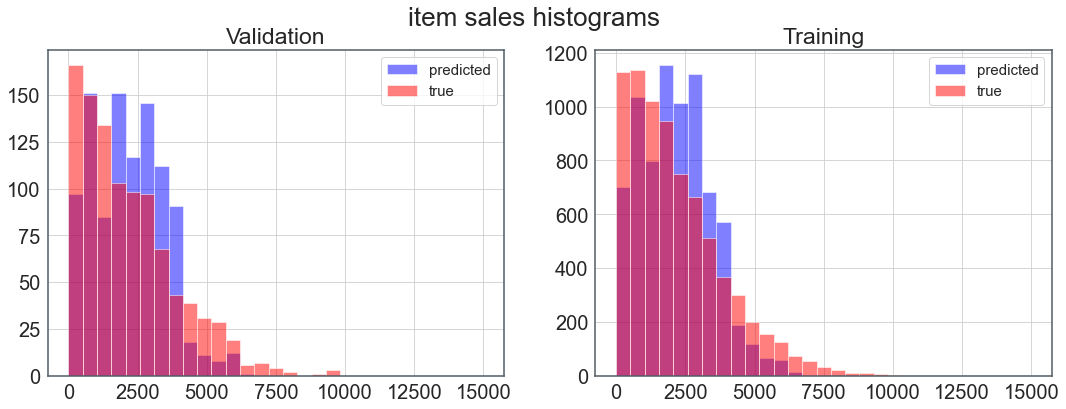

In [107]:
y_predicted_val = model.predict(x_val)
y_predicted_train = model.predict(x_train)
print(f"Total predicted test: {y_predicted_val.sum()}, Total real revenue: {y_val.values.sum()}")
print(f"Total predicted training: {y_predicted_train.sum()}, Total real training: {y_train.values.sum()}")
print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))

bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.hist(y_predicted_val, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_val, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.hist(y_predicted_train, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_train, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

RMSE validation: 1046.739318970521


[]

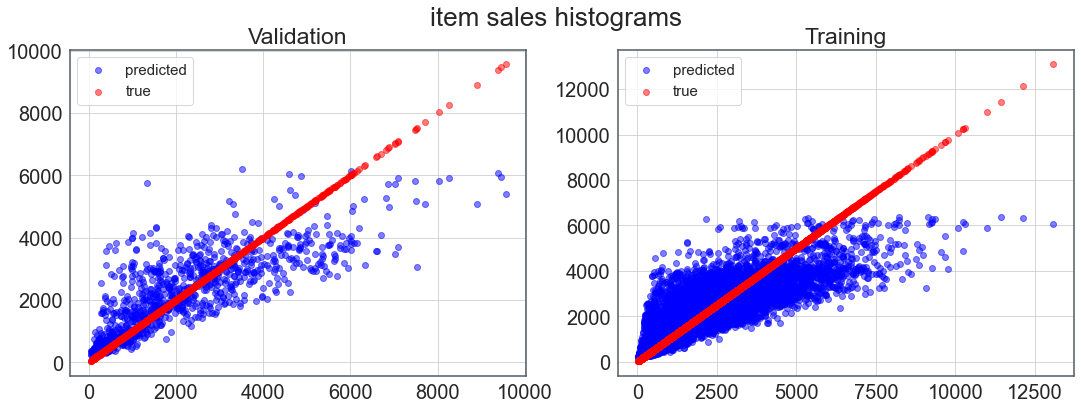

In [108]:
y_predicted_val = model.predict(x_val)
y_predicted_train = model.predict(x_train)

print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))
bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.scatter(y_val, y_predicted_val, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_val, y_val, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.scatter(y_train, y_predicted_train, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_train, y_train, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

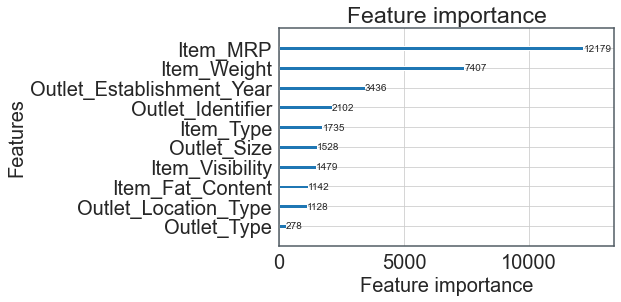

In [109]:
lgb.plot_importance(model)

### Truco log+1 prueba

Esto es por la forma skewed de la variable objetivo

In [110]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgb

train = pd.read_csv('data/Train_BigMart.csv')
test = pd.read_csv('data/Test_BigMart.csv')

train, validation = train_test_split(train, test_size=1000)

# train['Item_Outlet_Sales'].hist(bins=45)
# plt.show()
# validation['Item_Outlet_Sales'].hist(bins=45)
# plt.show()

droppable_columns = ['Item_Identifier'] 
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_columns = ['Item_Type',  'Outlet_Location_Type', 'Outlet_Type', 'Outlet_Size', 'Item_Fat_Content', 'Outlet_Identifier']
objective = 'Item_Outlet_Sales'

x_train, x_val, y_train, y_val = preprocessing(train, validation, droppable_columns, continuous_columns, categorical_columns, objective, LogTransform)

train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_columns)
validation_data = lgb.Dataset(x_val, label=y_val, categorical_feature=categorical_columns)


parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,
    "num_leaves": 128,  
    "max_bin": 512,
    "silent": True,
    "num_iterations": 100000,
    "n_estimators": 1000

}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=validation_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)



D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:114: SettingWithCopyWarning: 
A valu

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000772 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 0.975183
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 0.97167
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 0.968186
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's rmse: 0.964727
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's rmse: 0.961283
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's rmse: 0.957868
[LightGBM

Total predicted test: 1907749.4087843439, Total real revenue: 2186165.6186
Total predicted training: 14413580.803011965, Total real training: 16404959.7918
RMSE validation: 2202.4314054169336


[]

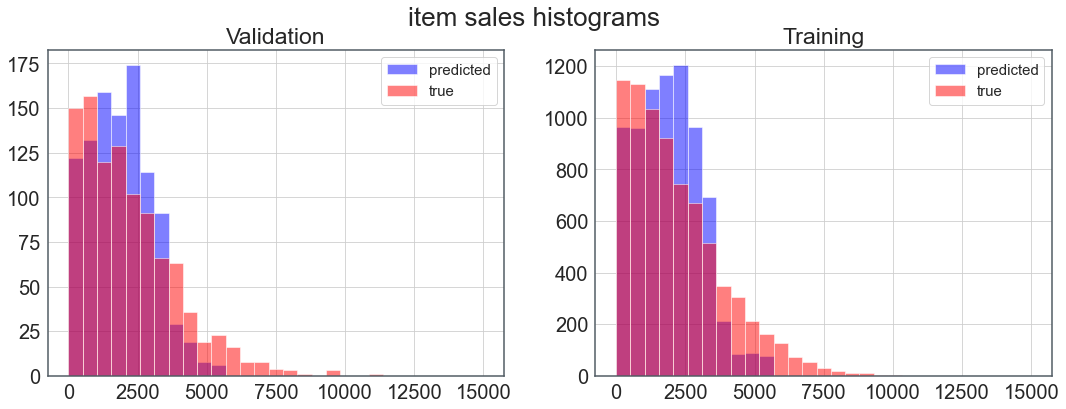

In [111]:
y_predicted_val = LogAntitransform(model.predict(x_val))
y_predicted_train = LogAntitransform(model.predict(x_train))
print(f"Total predicted test: {y_predicted_val.sum()}, Total real revenue: {LogAntitransform(y_val).values.sum()}")
print(f"Total predicted training: {y_predicted_train.sum()}, Total real training: {LogAntitransform(y_train).values.sum()}")
print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))

bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.hist(y_predicted_val, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(LogAntitransform(y_val), bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.hist(y_predicted_train, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(LogAntitransform(y_train), bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

[]

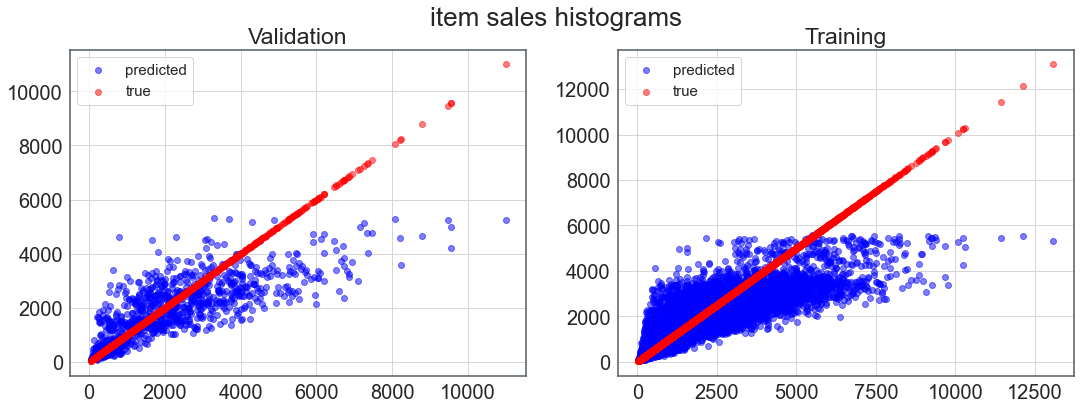

In [112]:
y_val = LogAntitransform(y_val)
y_train = LogAntitransform(y_train)
y_predicted_val = LogAntitransform(model.predict(x_val))
y_predicted_train = LogAntitransform(model.predict(x_train))

fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.scatter(y_val, y_predicted_val, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_val, y_val, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.scatter(y_train, y_predicted_train, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_train, y_train, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

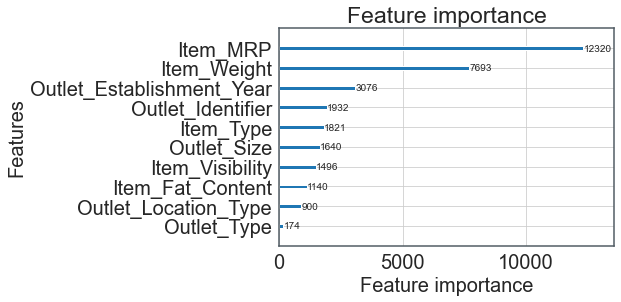

In [113]:
lgb.plot_importance(model)

## Segunda prueba: elimino atributos con poca importancia

In [118]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error as mse
import lightgbm as lgb

train = pd.read_csv('data/Train_BigMart.csv')
test = pd.read_csv('data/Test_BigMart.csv')

train, validation = train_test_split(train, test_size=1000)

droppable_columns = ['Item_Identifier', 'Outlet_Type', 'Outlet_Location_Type'] 
continuous_columns = ['Item_Weight', 'Item_Visibility', 'Item_MRP']
categorical_columns = ['Item_Type', 'Item_Fat_Content', 'Outlet_Identifier', 'Outlet_Size']
objective = 'Item_Outlet_Sales'

x_train, x_val, y_train, y_val = preprocessing(train, validation, droppable_columns, continuous_columns, categorical_columns, objective)#, Log_Transform)

train_data = lgb.Dataset(x_train, label=y_train, categorical_feature=categorical_columns)
validation_data = lgb.Dataset(x_val, label=y_val, categorical_feature=categorical_columns)


parameters = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['rmse'],
    'learning_rate': 0.005,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 6,
    "num_leaves": 128,  
    "max_bin": 512,
    "silent": True,
    "num_iterations": 100000,
    "n_estimators": 1000

}

model = lgb.train(parameters,
                       train_data,
                       valid_sets=validation_data,
                       num_boost_round=5000,
                       early_stopping_rounds=100)



D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:111: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:112: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:113: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
D:\Anaconda3\envs\tesis\lib\site-packages\ipykernel_launcher.py:114: SettingWithCopyWarning: 
A valu

[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000846 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Warning] Unknown parameter: silent
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[1]	valid_0's rmse: 1715.1
Training until validation scores don't improve for 100 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[2]	valid_0's rmse: 1709.74
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[3]	valid_0's rmse: 1707.48
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[4]	valid_0's rmse: 1705.24
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[5]	valid_0's rmse: 1699.97
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[6]	valid_0's rmse: 1694.72
[LightGBM] [War

Total predicted test: 2217288.620876319, Total real revenue: 2210842.8298
Total predicted training: 16368628.428611081, Total real training: 16380282.5806
RMSE validation: 1055.8427312731367


[]

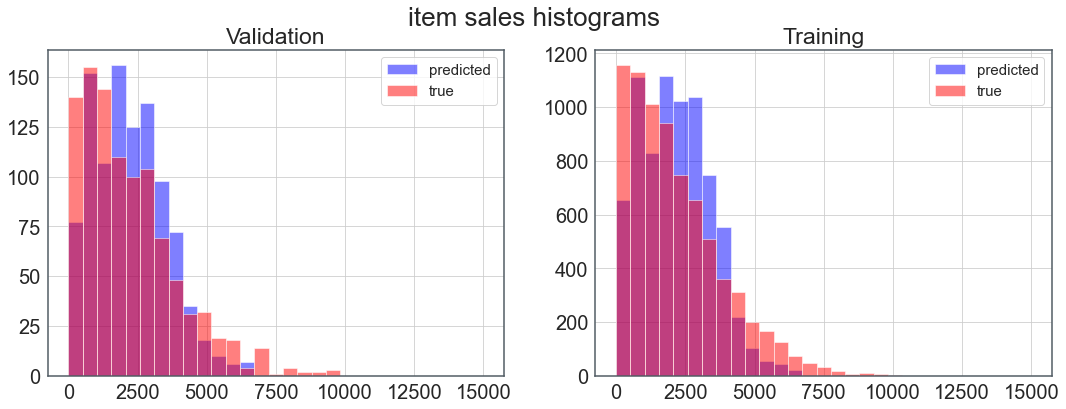

In [120]:
y_predicted_val = model.predict(x_val)
y_predicted_train = model.predict(x_train)
print(f"Total predicted test: {y_predicted_val.sum()}, Total real revenue: {y_val.values.sum()}")
print(f"Total predicted training: {y_predicted_train.sum()}, Total real training: {y_train.values.sum()}")
print('RMSE validation:', np.sqrt(mse(y_predicted_val, y_val)))

bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.hist(y_predicted_val, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_val, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.hist(y_predicted_train, bins=bins, alpha=0.5, color="blue", label="predicted")
ax.hist(y_train, bins=bins, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

[]

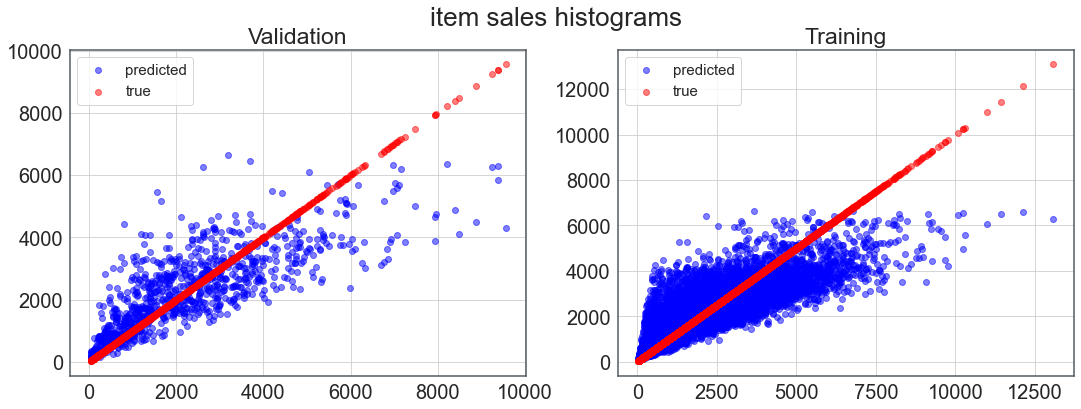

In [121]:
y_predicted_val = model.predict(x_val)
y_predicted_train = model.predict(x_train)

bins = np.linspace(0, 15000, 30)
fig = plt.figure(figsize=(18,6))
fig.suptitle('item sales histograms')
ax = plt.subplot(121)
ax.scatter(y_val, y_predicted_val, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_val, y_val, alpha = 0.5, color="red", label="true")
ax.set_title('Validation')
ax.legend()
ax = plt.subplot(122)
ax.scatter(y_train, y_predicted_train, alpha=0.5, color="blue", label="predicted")
ax.scatter(y_train, y_train, alpha = 0.5, color="red", label="true")
ax.set_title('Training')
ax.legend()
plt.plot()

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

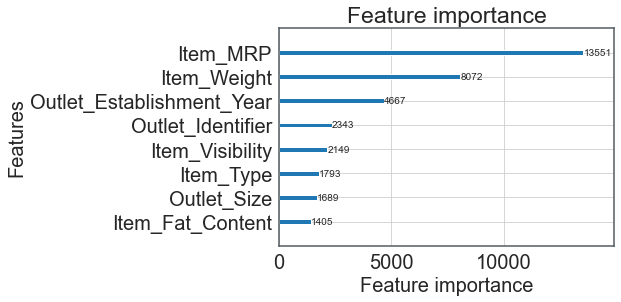

In [122]:
lgb.plot_importance(model)

# Plot auxiliar

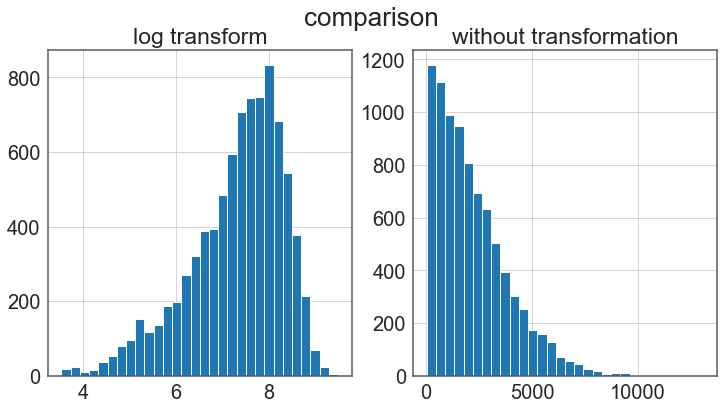

In [167]:
train = pd.read_csv('data/Train_BigMart.csv')

plt.figure(figsize=(12,6))
ax = plt.subplot(121)
ax.hist(LogTransform(train['Item_Outlet_Sales']), bins = 30)
ax.set_title('log transform')

ax = plt.subplot(122)
ax.hist(train['Item_Outlet_Sales'], bins = 30)
ax.set_title('without transformation')

plt.suptitle('comparison')
plt.show()

In [15]:
ventas = np.zeros(len(train['Item_Type'].unique()))
c=0
for key in train['Item_Type'].unique():
    ventas[c] = (np.sum(train['Item_Outlet_Sales'][train['Item_Type']==key]))
    c += 1
    
ventas, item_types = zip(*sorted(zip(ventas, train['Item_Type'].unique())))

for i in range(len(ventas)-1, 0, -1):
    print('Tipo de item: {}, ventas acumuladas: {}'.format(item_types[i], ventas[i]))

Tipo de item: Fruits and Vegetables, ventas acumuladas: 2820059.8168
Tipo de item: Snack Foods, ventas acumuladas: 2732786.0870000003
Tipo de item: Household, ventas acumuladas: 2055493.7131999999
Tipo de item: Frozen Foods, ventas acumuladas: 1825734.7886
Tipo de item: Dairy, ventas acumuladas: 1522594.0512
Tipo de item: Canned, ventas acumuladas: 1444151.4926
Tipo de item: Baking Goods, ventas acumuladas: 1265525.3421999998
Tipo de item: Health and Hygiene, ventas acumuladas: 1045200.1378000001
Tipo de item: Meat, ventas acumuladas: 917565.612
Tipo de item: Soft Drinks, ventas acumuladas: 892897.7220000001
Tipo de item: Breads, ventas acumuladas: 553237.1888
Tipo de item: Hard Drinks, ventas acumuladas: 457793.42720000003
Tipo de item: Starchy Foods, ventas acumuladas: 351401.25039999996
Tipo de item: Others, ventas acumuladas: 325517.6096
Tipo de item: Breakfast, ventas acumuladas: 232298.9516
